<a href="https://colab.research.google.com/github/astrodatos/proyecto_iluminatiuwu/blob/master/Algoritmo_(beta).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from astropy import units as u
from astropy.coordinates import SkyCoord

!pip install astroquery #esto para instalar astroquery
from astroquery.gaia import Gaia 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [95]:
"""
job = Gaia.launch_job_async("select top 100000 \
solution_id,random_index,source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp,teff_val,lum_val,radius_val \
from gaiadr2.gaia_source order by random_index") #obtenemos los datos de 1000000 estrellas con los anteriores atributos en un Asynchronous query

print(job) 
r = job.get_results()
print(r)
"""

'\njob = Gaia.launch_job_async("select top 100000 solution_id,random_index,source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp,teff_val,lum_val,radius_val from gaiadr2.gaia_source order by random_index") #obtenemos los datos de 1000000 estrellas con los anteriores atributos en un Asynchronous query\n\nprint(job) \nr = job.get_results()\nprint(r)\n'

In [93]:
"""
jobpd=r.to_pandas() #convertimos el job a pandas
jobpd[:10] #vemos las primeras 10 filas para ver que todo está bien
"""

'\njobpd=r.to_pandas() #convertimos el job a pandas\njobpd[:10] #vemos las primeras 10 filas para ver que todo está bien\n'

In [96]:
"""
pd.Series.count(jobpd.iloc[:,11]) #con esto obtenemos el número de estrellas que poseen info de teff_val
datamask = np.logical_not(np.isnan(jobpd.iloc[:,11]))

filtdata=jobpd.loc[datamask]

filtdata['class'] = 'A' #esto se arregla en la celda de abajo

filtdata
"""

"\npd.Series.count(jobpd.iloc[:,11]) #con esto obtenemos el número de estrellas que poseen info de teff_val\ndatamask = np.logical_not(np.isnan(jobpd.iloc[:,11]))\n\nfiltdata=jobpd.loc[datamask]\n\nfiltdata['class'] = 'A' #esto se arregla en la celda de abajo\n\nfiltdata\n"

In [97]:
"""
maskO = (filtdata["teff_val"]>=33000)
filtdata.loc[maskO,'class'] = 'O'
maskB = (filtdata["teff_val"]>=10000) & (filtdata["teff_val"]<33000)
filtdata.loc[maskB,'class'] = 'B'
maskA = (filtdata["teff_val"]>=7500) & (filtdata["teff_val"]<10000)
filtdata.loc[maskA,'class'] = 'A'
maskF = (filtdata["teff_val"]>=6000) & (filtdata["teff_val"]<7500)
filtdata.loc[maskF,'class'] = 'F'
maskG = (filtdata["teff_val"]>=5200) & (filtdata["teff_val"]<6000)
filtdata.loc[maskG,'class'] = 'G'
maskK = (filtdata["teff_val"]>=3700) & (filtdata["teff_val"]<5200)
filtdata.loc[maskK,'class'] = 'K'
maskM = (filtdata["teff_val"]<3700)
filtdata.loc[maskM,'class'] = 'M'

filtdata
"""

'\nmaskO = (filtdata["teff_val"]>=33000)\nfiltdata.loc[maskO,\'class\'] = \'O\'\nmaskB = (filtdata["teff_val"]>=10000) & (filtdata["teff_val"]<33000)\nfiltdata.loc[maskB,\'class\'] = \'B\'\nmaskA = (filtdata["teff_val"]>=7500) & (filtdata["teff_val"]<10000)\nfiltdata.loc[maskA,\'class\'] = \'A\'\nmaskF = (filtdata["teff_val"]>=6000) & (filtdata["teff_val"]<7500)\nfiltdata.loc[maskF,\'class\'] = \'F\'\nmaskG = (filtdata["teff_val"]>=5200) & (filtdata["teff_val"]<6000)\nfiltdata.loc[maskG,\'class\'] = \'G\'\nmaskK = (filtdata["teff_val"]>=3700) & (filtdata["teff_val"]<5200)\nfiltdata.loc[maskK,\'class\'] = \'K\'\nmaskM = (filtdata["teff_val"]<3700)\nfiltdata.loc[maskM,\'class\'] = \'M\'\n\nfiltdata\n'

In [0]:
"""
filtdata.to_csv("tabla_temperatura_y_tipo_espectral_(10mil).csv")
"""

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


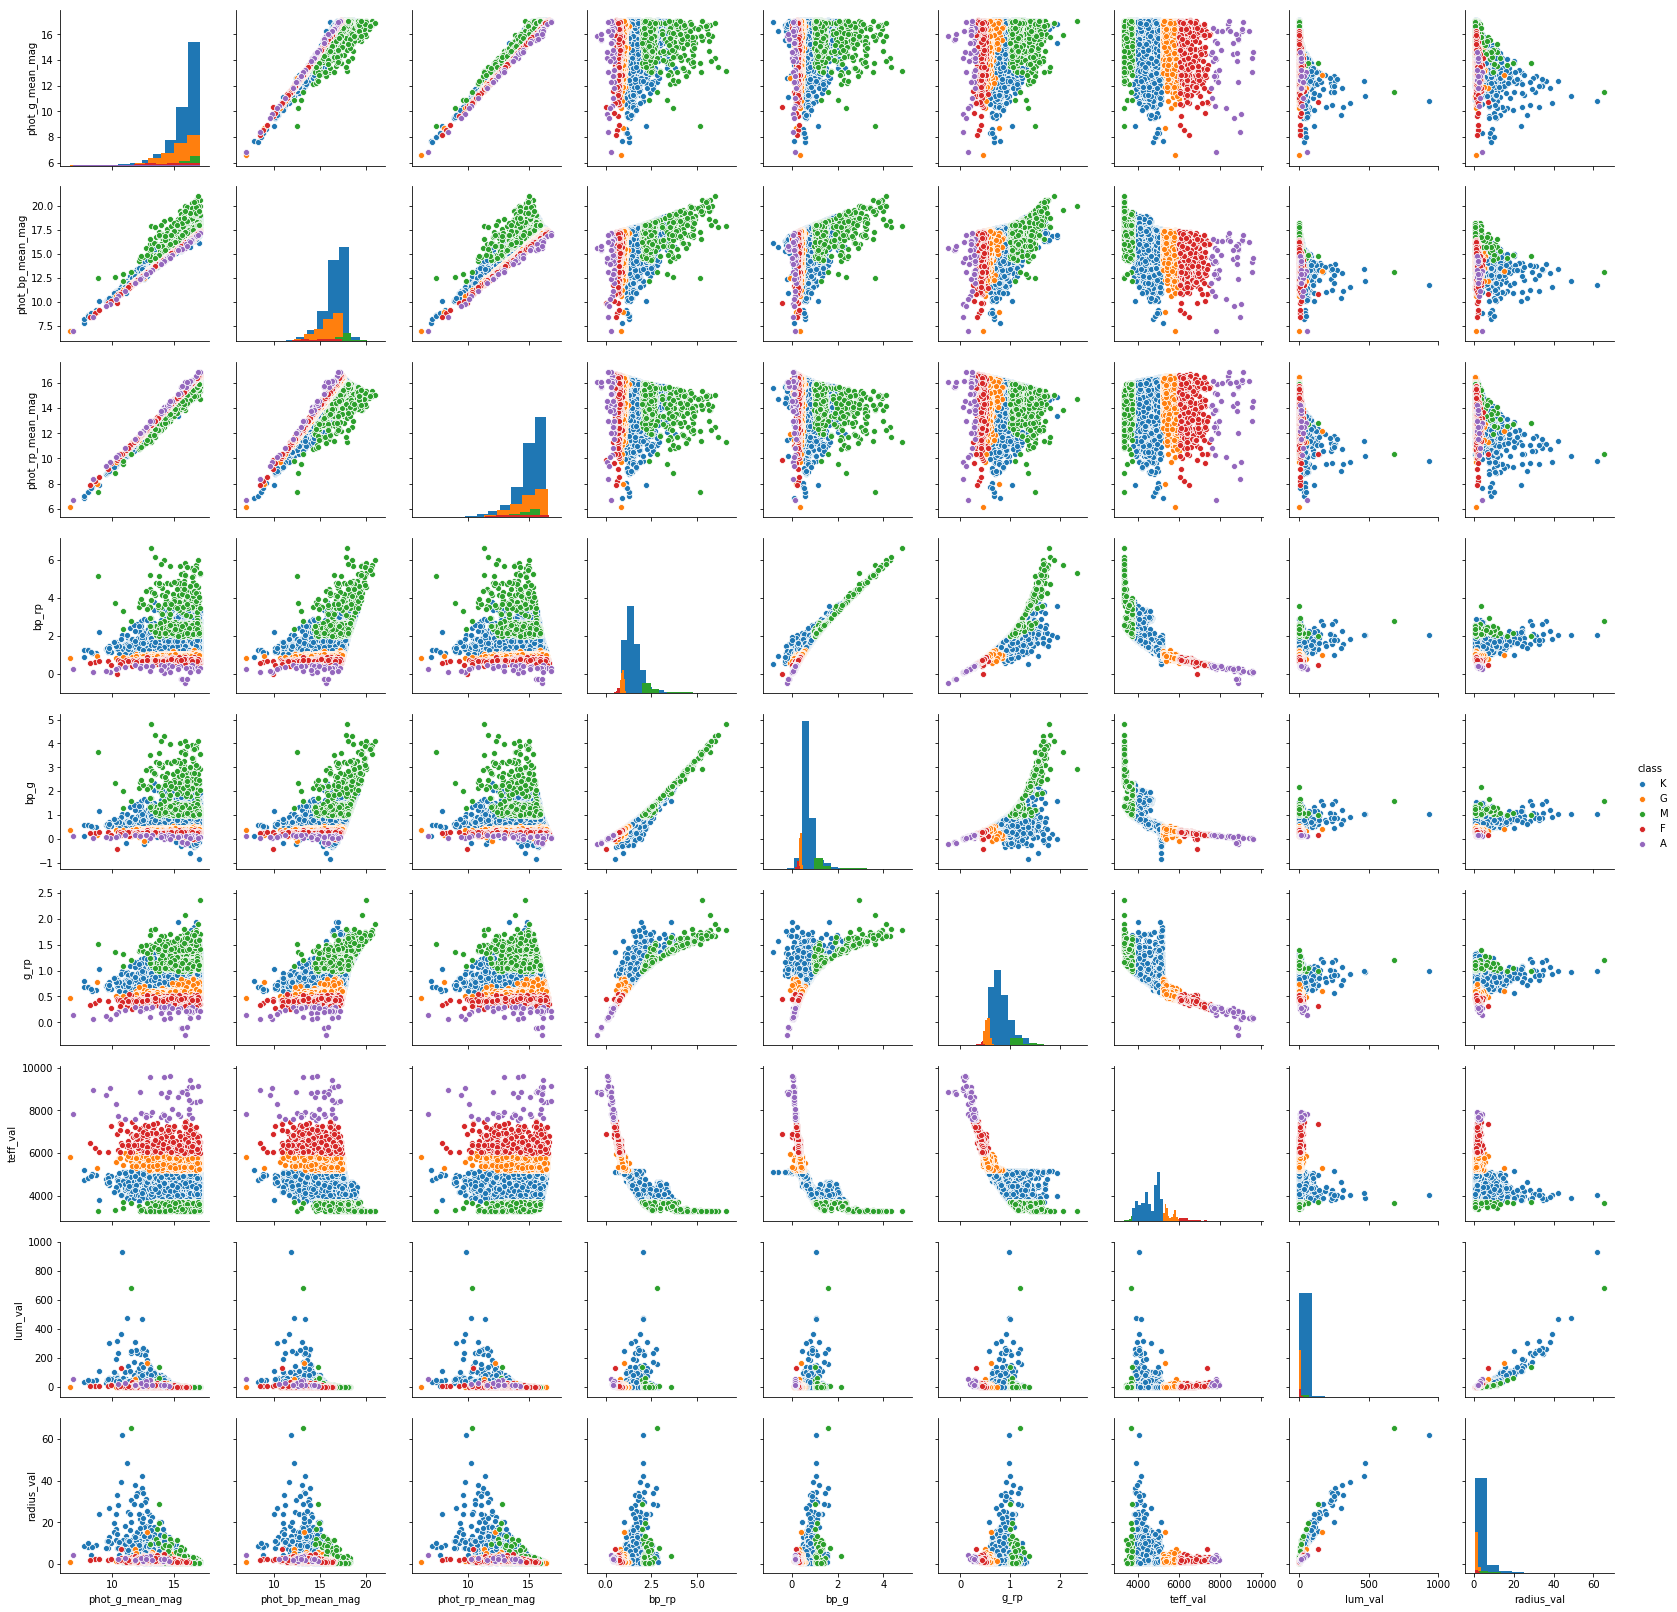

In [88]:
data10=pd.read_csv("https://raw.githubusercontent.com/astrodatos/proyecto_iluminatiuwu/master/tabla_temperatura_y_tipo_espectral_(10mil).csv")
#OJO SI DICE 10 MIL O 100 MIL EN EL ENLACE DE ARRIBA, LO MISMO PARA DATA10 O DATA100
#por temas de tiempo, puede ser mejor usar 10mil estrellas 
atributos=['phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','bp_rp','bp_g','g_rp','teff_val','lum_val','radius_val']
sns.pairplot(data10, hue = 'class', vars=atributos, diag_kind = 'hist')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


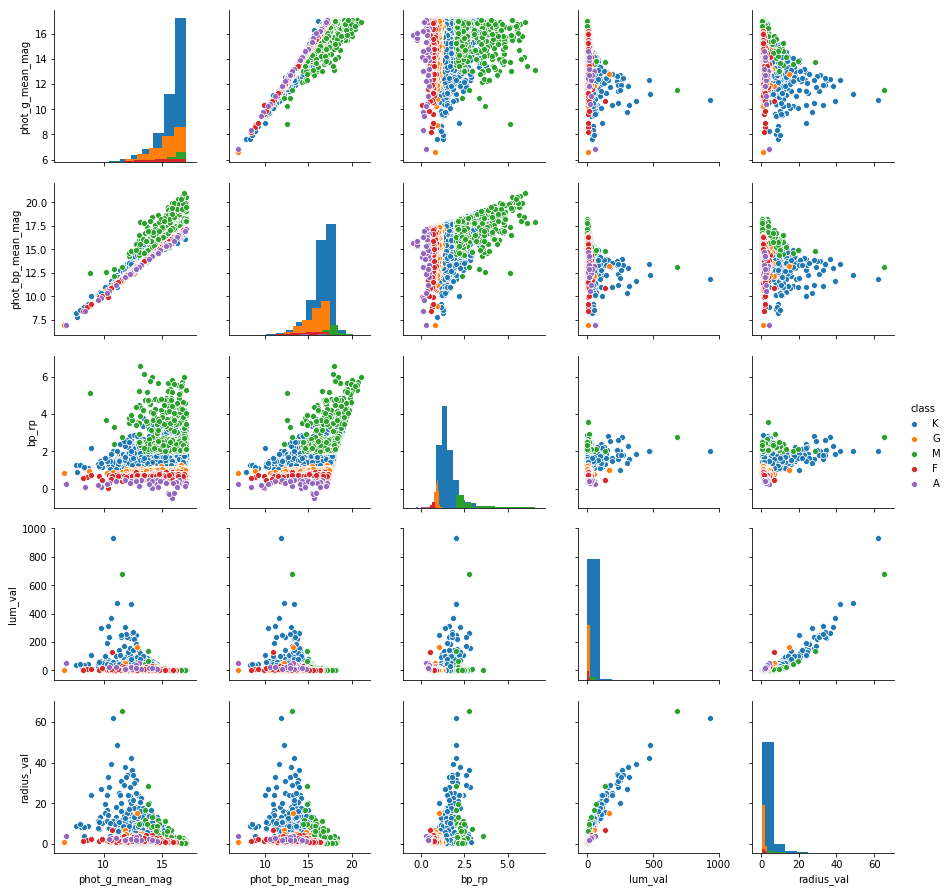

In [89]:
#Relaciones interesantes 
sns.pairplot(data10[['phot_g_mean_mag', 'phot_bp_mean_mag','bp_rp', 'lum_val','radius_val', 'class']], hue = 'class',diag_kind = 'hist')

In [0]:
#clases = data10['class'].unique() 
#mapa = {}
#for clase, i in enumerate(clases):
    #mapa[i] = clase
#clases
#mapa #No salen las clases O y B en clases ni en mapa por alguna 
#extraña razón, por lo que tendremos que hacerlo a mano


clases = np.array(['O','B','A','F','G','K','M'], dtype=object)
mapa={'O':0,'B':1,'A':2,'F':3,'G':4,'K':5,'M':6}


#data10
phot_g_mean_mag10=data10.iloc[:,6]
phot_bp_mean_mag10=data10.iloc[:,7]
phot_rp_mean_mag10=data10.iloc[:,8]
bp_rp10=data10.iloc[:,9]
bp_g10=data10.iloc[:,10]
g_rp10=data10.iloc[:,11]
teff_val10=data10.iloc[:,12]
lum_val10=data10.iloc[:,13]
radius_val10=data10.iloc[:,14]

tabla = ('/content/gdrive/My Drive/Taller de proyecto/tabla_1millon.csv')
tabla1millon=pd.read_csv(tabla)
phot_g_mean_mag1M=tabla1millon.iloc[:,6]
phot_bp_mean_mag1M=tabla1millon.iloc[:,7]
phot_rp_mean_mag1M=tabla1millon.iloc[:,8]
bp_rp1M=tabla1millon.iloc[:,9]
bp_g1M=tabla1millon.iloc[:,10]
g_rp1M=tabla1millon.iloc[:,11]
teff_val1M=tabla1millon.iloc[:,12]
lum_val1M=tabla1millon.iloc[:,13]
radius_val1M=tabla1millon.iloc[:,14]

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets 
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.svm import SVR
from sklearn.svm import SVC

#SUPPORT VECTOR MACHINE

clf = SVC(gamma='auto')

datamask = np.logical_not(np.isnan(data100.iloc[:,11]))
filtdata100=data100.loc[datamask]

data100_sinclases = np.array(filtdata100.iloc[:,:-1])
clases_a_numeros = np.array(filtdata100['class'].map(mapa))

# Guardamos la semilla para separar aleatoriamente los datos
rs = 1851

# Separamos el conjunto de entrenamiento y prueba usando scikit-learn y la semilla anterior
# Escogemos un conjunto de entrenamiento del 70% de las muestras y 30% de test
train_X, test_X, train_y, test_y = train_test_split(data100_sinclases, clases_a_numeros, test_size = 0.3, random_state = rs)

clf.fit(train_X, train_y)



#RANDOM FOREST

ValueError: ignored